Funciones Teóricas de Probabilidad --- 15:51 min
===

* 15:51 min | Ultima modificación: Octubre 17, 2021 | [YouTube](https://youtu.be/Sjpdbo4xL6I)

Hasta ahora, los ejemplos presentados han sido resueltos a partir de la noción de probabilidad como frecuencia; es decir, la probabilidad ha sido calculada mediante el conteo de los eventos posibles en el universo. Sin embargo, esta aproximación no puede ser usada en todos los casos. Las funciones teóricas de probabilidad son funciones matemáticas que asocian una probabilidad específica a cada punto del dominio de la función y permiten representar muchas situaciones del mundo real. En este tutorial se presentan las principales funciones de probabilidad, las cuales serán usadas posteriormente dentro de la solucón de muchos casos de aplicación en Analítica Predictiva.

In [6]:
import math

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm

Definiciones básicas
---

### Espacio muestral 

Es el conjunto $S$ de todos los posibles resultados de un experimento.

### Función de probabilidad

Dado un espacio muestral $S$ y un conjunto de eventos $A_i$ mutuamente exclusivos y colectivamente exhasutivos, una *función de probabilidad* es una función Pr cualquiera que:

* $\text{Pr}(A_i) \ge 0, \quad \forall A \in S$


* $\text{Pr}(S) = 1$.

### Variable aleatoria

Una variable aletaoria $X$ es una función que mapea el espacio muestral en los números reales.

### Función de distribución acumulada de $X$ o $F_X(x)$

Es la función

$$F_X(x) = \text{Pr}_X (X \le x), \quad \forall x$$

Tal que:

* $\lim_{x \to -\infty} F_X(x) = 0$ y $\lim_{x \to \infty} F_X(x) = 1$
* $F_X(x)$ es no una función no decreciente de x.
* $F_X(x)$ es continua por la derecha (existencia).

### Función de masa de probabilidad

La función de masa de probabilidad $f_X(s)$ de una variable aleatoria discreta $X$ es dada por:

$$f_X(x) = \text{Pr}(X=x), \qquad \forall x.$$

### Función de densidad de probabilidad

La función $f_X(x)$ para una variable aleatoria continua $X$ es una función que satisface con:

$$F_X(x) = \int_{-\infty}^x f_X(t) dt, \quad \forall x.$$

### Valor esperado

El valor esperado o media de una variable aleatoria $g(X)$, denotado como $\text{E}g(X)$, es:

$$ \text{E}g(X) =
   \begin{cases}      
      \int_{-\infty}^\infty g(x)f_X(x), & \text{Si $X$ es continua}\\
      \\
      \sum_{x \in X} g(x)f_X(x) = g(x)\text{Pr}(X=x), & \text{Si $X$ es discreta}
   \end{cases}
$$

### Momentos de una distribución

El $n$-ésimo momento se define como:

$$M_n = \text{E}(x^n) = \int u^n f_X(t) dt$$

* Media o valor esperado:

$$ \text{E}(x) = \mu_x=\int u·f_X(t) dt = M_1$$

* Varianza:

$$\text{V}(x)= \sigma^2_x = \text{E}[(x-\mu)^2]=M_2 - M_1^2$$


* Simetría:

$$\text{S}_x = \text{E}[(x-\mu)^3]=M_3 - 3M_2M_1 + 2M_1^3$$

* Curtosis:

$$\text{K}_x = \text{E}[(x-\mu)^4]=M_4 - 4M_3M_1 + 6M_2M_1^2 - 3M_1^4$$




**Interpretación gráfica**

![assets/momentos-distribucion.jpg](assets/momentos-distribucion.jpg)

Principales distribuciones de probabilidad
---

### Distribución de Bernoulli


En esta distribución se tiene un experiemento en el cual hay dos y solo dos resultados posibles. Una variable aleatoria $X$ sigue una distribución de Bernoulli de orden $p$ si:

$$ X =
   \begin{cases}
      1, & \text{con probabilidad $p$} \\
      0, &\text{con probabilidad $1-p$}
   \end{cases}
$$

con:

$$\text{E}(X) = 1p + 0(1-p)=p$$

$$\text{Var}(X) = (1-p)^2p + (0-p)^2(1-p)=p(1-p)$$

In [3]:
#
# Simulación de 5 tiradas de una moneda
#
np.random.seed(123456)

random_numbers = np.random.random(size=5)
display(random_numbers)
heads = random_numbers < 0.5
display(heads)

array([0.12696983, 0.96671784, 0.26047601, 0.89723652, 0.37674972])

array([ True, False,  True, False,  True])

### Distribución Binomial

La distribución binomial se obtiene al considerar una secuencia de $n$ experimentos independientes de Bernoulli y se obtienen exactamente $Y$ éxitos, es decir, ocurre $X=1$, $y$ veces. En otras palabras, si se tiene una secuencia de $n$ experimentos idénticos, cada uno con una probabilidad de éxito $p$, y se definen las variables aleatorias $X_1$, ..., $X_n$ como:

$$ X_i =
   \begin{cases}
      1, & \text{con probabilidad $p$} \\
      0, &\text{con probabilidad $1-p$}
   \end{cases}
$$

La variable aleatoria

$$Y = \sum_{i=1}^n X_i$$

sigue una distribución binomial($n$, $p$).



In [4]:
#
# Simulación del número de exitos en 5 tiradas de
# una moneda
#
np.random.binomial(5, 0.5)

2

In [5]:
#
# Simulación del número de éxitos en 5 tiradas de
# una moneda repetido 10 veces.
#
np.random.binomial(5, 0.5, 10)

array([2, 4, 1, 3, 2, 2, 1, 4, 4, 2])

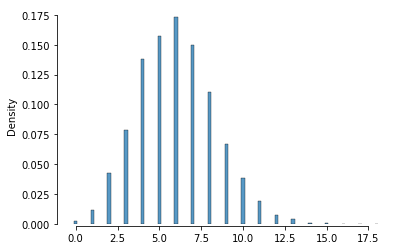

In [19]:
#
# Función de densidad de probabilidad simulada
#
samples = np.random.binomial(60, ., 10000)
sns.histplot(samples, discrete=True, shrink=0.2, stat="density")
sns.despine(trim=True, offset=2)
plt.show()

### Distribución Uniforme Discreta

Una variable aletoria $X$ tiene una [distribución discreta uniforme](https://es.wikipedia.org/wiki/Distribución_uniforme_discreta) (1, $N$) si:

$$\text{Pr}(X=x|N) = \frac{1}{N}, \quad x=1,...,N$$

donde $N$ es un entero.

$$\text{E}(X) = \frac{N+1}{2}$$

$$\text{Var}(X) = \frac{(N+1)(N-1)}{12}$$

### Distribución Poisson

Esta distribución se usa para modelar el número de ocurrencias de un evento en un intervalo de tiempo. Una variable $X$ sigue una distribución de Poisson($\lambda$), si:

$$P(X=x|\lambda) = \frac{\exp(-\lambda) * \lambda^x}{x!}, \quad x=0,1,...$$

con:

$$\text{E}(X)=\text{Var}(X) = \lambda$$

### Distribución Normal

La función de densidad de probabilidad de una [distribución normal](https://es.wikipedia.org/wiki/Distribución_normal) con media $\mu$ y varianza $\sigma^2$ se define como:

$$f(x | \mu, \sigma^2) =\frac{1}{\sigma \sqrt{2\pi}} \exp \left\{ -\frac{1}{2} \frac{(x-\mu)^2}{\sigma^2} \right\}$$


Para la distribución normal:
* $M_1 = \mu$
* $M_2 = \sigma^2$
* $M_3 = 0$
* $M_4 = 3\sigma^2$

Consulte su historia en [Wikipedia](https://es.wikipedia.org/wiki/Distribución_normal).

En la siguiente figura se observan diferentes distribuciones normales que varian en su media y varianza.

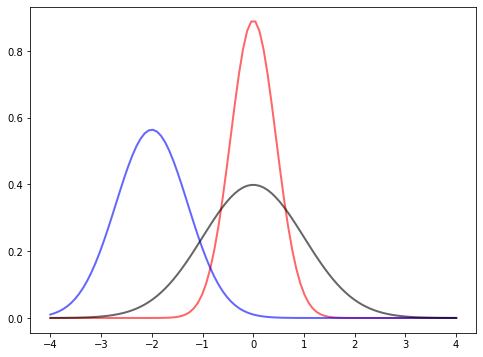

In [2]:
plt.figure(figsize=(8, 6))
x = np.linspace(-4, +4, 100)
plt.plot(x, norm.pdf(x, loc=0.0, scale=math.sqrt(0.2)), "r-", lw=2, alpha=0.6, label="")
plt.plot(
    x, norm.pdf(x, loc=-2.0, scale=math.sqrt(0.5)), "b-", lw=2, alpha=0.6, label=""
)
plt.plot(x, norm.pdf(x, loc=0.0, scale=math.sqrt(1.0)), "k-", lw=2, alpha=0.6, label="")
plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.show()

**Propiedades útiles:**

Sean $x \sim \text{N}(\mu_x, \sigma^2_x)$ y $y \sim \text{N}(\mu_y, \sigma^2_y)$, entonces:

$$x + y \sim \text{N}\left(\mu_x + \mu_y, \sigma_x^2 + \sigma_y^2\right)$$

Sea $x \sim \text{N}(\mu_x, \sigma^2_x)$ y los números reales arbitrarios $a$ y $b$, entonces:

$$ax + b \sim \text{N}\left(a \mu_x + b, a^2 \sigma_x^2\right)$$

Sean $x \sim \text{N}(\mu_x, \sigma^2_x)$ y $\varepsilon \sim \text{N}(0, 1^2)$, entonces:

$$x  \sim \mu + \sigma \varepsilon$$

### Distribución Normal Estándar

La distribución normal estándar se obtiene al hacer $\mu=0$ y $\sigma=1$ en la distribución normal:

$$f(z) =\frac{1}{\sqrt{2\pi}} \exp \left\{ -\frac{1}{2} z^2 \right\}$$

**Intevalos de confianza.** Corresponden a los valores de $x$ para los cuales el área central de la normal es igual al porcentaje especificado. En la imagen presentada a continuación se grafican los intervalos de confianza para $\pm \; 3 \sigma$, $\pm \; 2 \sigma$ y $\pm \; \sigma$, que equivalen a áreas del 99.73%, 95.44% y 68.26% respectivamente. 

![assets/intervalos-confianza.jpg](assets/intervalos-confianza.jpg)

Los valores del área para cada caso se calcularían asi:

In [3]:
# para +/- 3 * sigma
1.0 - 2 * norm.cdf(-3)

0.9973002039367398

In [4]:
# para +/- 2 * sigma
1.0 - 2 * norm.cdf(-2)

0.9544997361036416

In [5]:
# para +/- 1 * sigma
1.0 - 2 * norm.cdf(-1)

0.6826894921370859

### Distribución Lognormal

La variable aleatoria $x$ sigue una distribución [lognormal](https://es.wikipedia.org/wiki/Distribución_log-normal) si:

$$\log (x) \sim \text{N}(\mu, \sigma^2)$$

**Actividad.---** Grafique la función de densidad de probabilidad para la distribución lognormal para:
* $\mu$=1.0 y $\sigma$ = 0.5
* $\mu$=1.0 y $\sigma$ = 1.0
* $\mu$=1.5 y $\sigma$ = 0.5

Haga click [aquí](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html) para obtener ayuda de las funciones del lenguaje Python para esta distribución.

**Actividad.---** Para las tres distribuciones anteriores, grafique la región correspondiente a los intevalos de confianza del 95%.

### Distribución $t$ de Student:

Sean $x_i,...,x_n \sim \text{N}(\mu, \sigma^2)$, entonces:

$$\frac{M_1 - \mu}{\sqrt{\frac{1}{n}M_2}} \sim t_{n-1}$$

Esta [distribución](https://es.wikipedia.org/wiki/Distribución_t_de_Student) tiene una forma similar a la distribución normal pero un poco más delgada y con colas más pesadas, haciéndose más similar a la distribución normal conforme $n$ aumenta. Históricamente fue derivada como la aproximación a la distribución de probabilidades de la media de $n$ datos provenientes de una distribución con media $\mu$ y varianza $\sigma^2$. 

**Actividad.---** Grafique una distribución normal estándar y distribuciones $t$ con 3, 5 y 10 grados de libertad.

### Distribución Chi-cuadrada

Sea $z_i \sim \text{N}(0, 1)$, para $i=1,..., n$, entonces:

$$z_1^2 + z_2^2 + \ldots + z_n^2 \sim \chi_n^2$$

### Distribución F

Sean $x_i, y_j \sim \text{N}(0, 1)$, para $i=1,..., n$ y $j=1,...,m$, entonces:

$$F = \frac{\sum_{i=1}^n x_i^2 / n}{\sum_{j=1}^m y_i^2} \sim F_{n,m}$$

### Distribución Exponencial

En esta distribución:

$$f(X|\beta)=\frac{1}{\beta}\exp \left( \frac{-x}{\beta} \right)$$

La cual es usada para modelar tiempos de vida.

$$\text{E}(X)= \beta$$

$$\text{Var}(X) = \beta^2$$

Ejemplo: El tiempo entre arrivos que siguen una distribución de Poisson sigue una distribución exponencial.

### Distribución de Weibull

La distribución de [Weibull](https://es.wikipedia.org/wiki/Distribución_de_Weibull) se usa para modelar la distribución de fallos en sistemas cuando la tasa de fallos es proporcional a una potencia del tiempo. Se define como:

$$f(X|\lambda, k) = 
   \begin{cases}
      \frac{k}{\lambda} \left( \frac{X}{\lambda} \right)^{k-1} 
      \exp \left( - \left(\frac{x}{\lambda} \right)^k \right), & x \ge 0 \\
      0, & x < 0
   \end{cases}
$$

* $k < 1$ indica que la tasa de fallos decrece con el tiempo.
* $k=1$ la tasa de fallos es constante en el tiempo.
* $k>1$ indica que la tasa de fallos crece en el tiempo.